In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


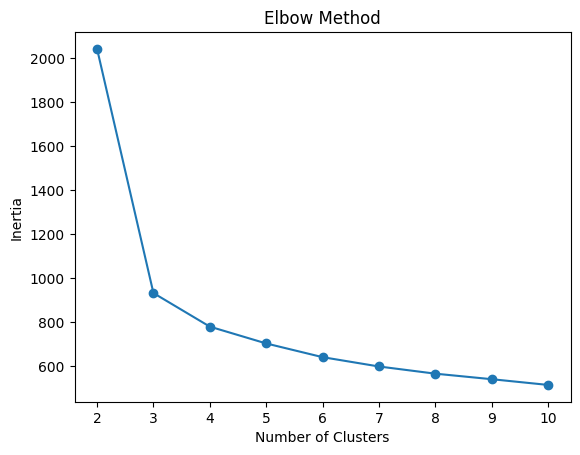

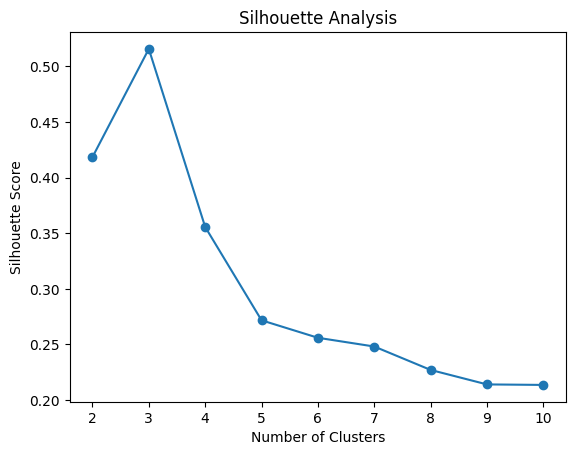

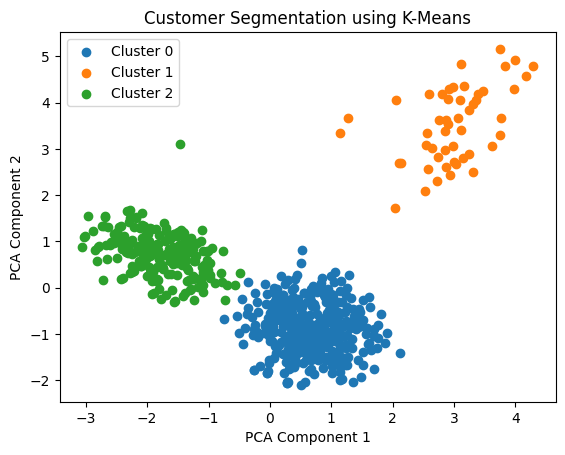


Cluster Characteristics:

         Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Cluster                                                            
0            33782.383420            5.515544           3.489637   
1           141040.000000            8.740000           0.600000   
2            12174.107143            2.410714           0.933036   

         Total_visits_online  Total_calls_made  
Cluster                                         
0                   0.981865          2.000000  
1                  10.900000          1.080000  
2                   3.553571          6.870536  


In [2]:

def load_dataset(file_path):
    return pd.read_csv(file_path)

def preprocess_data(data):
    selected_features = [
        "Avg_Credit_Limit",
        "Total_Credit_Cards",
        "Total_visits_bank",
        "Total_visits_online",
        "Total_calls_made"
    ]

    data_selected = data[selected_features]

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_selected)

    return scaled_data, data_selected

def determine_optimal_clusters(data):
    inertia = []
    silhouette_scores = []

    k_range = range(2, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, labels))

    plt.figure()
    plt.plot(k_range, inertia, marker='o')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.title("Elbow Method")
    plt.show()

    plt.figure()
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Analysis")
    plt.show()

def apply_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    return kmeans.fit_predict(data)

def visualize_clusters(data, labels, n_clusters):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    plt.figure()
    for cluster in range(n_clusters):
        plt.scatter(
            reduced_data[labels == cluster, 0],
            reduced_data[labels == cluster, 1],
            label=f"Cluster {cluster}"
        )

    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("Customer Segmentation using K-Means")
    plt.legend()
    plt.show()

def display_cluster_statistics(original_data, labels, n_clusters):
    data_with_labels = original_data.copy()
    data_with_labels["Cluster"] = labels

    print("\nCluster Characteristics:\n")
    print(data_with_labels.groupby("Cluster").mean())

def main():
    file_path = "data.csv"

    data = load_dataset(file_path)

    scaled_data, original_data = preprocess_data(data)

    determine_optimal_clusters(scaled_data)

    optimal_clusters = 3

    labels = apply_kmeans(scaled_data, optimal_clusters)

    visualize_clusters(scaled_data, labels, optimal_clusters)

    display_cluster_statistics(original_data, labels, optimal_clusters)

if __name__ == "__main__":
    main()
